In [1]:
import os
import pandas as pd
import seaborn as sns
# import plotter
%matplotlib inline

# sns.set_theme(style="whitegrid", palette="muted")
sns.set_theme()

In [2]:
full_df, filt_df = plotter.snr_compare()
full_df = full_df.loc[(full_df['noise_std'] < 1.85)]

NameError: name 'plotter' is not defined

In [ ]:
full_df.head()

In [ ]:
filt_df

In [ ]:
df = filt_df.groupby(['scan_type', 'sub_num'])['SNR'].describe().round(3)
df

In [ ]:
tof_df = filt_df.loc[(filt_df['scan_type'] == 'TOF')]
tof_df_m = tof_df.groupby(['sub_num'])['SNR'].describe().round(3)
ute_df = filt_df.loc[(filt_df['scan_type'] == 'hr')]
ute_df_m = ute_df.groupby(['sub_num'])['SNR'].describe().round(3)
ute_df_m['mean']
df = ute_df_m['mean'] / tof_df_m['mean']
df.describe().round(2)

In [ ]:
tof_df = filt_df.loc[(filt_df['scan_type'] == 'TOF')]
tof_df_m = tof_df.groupby(['sub_num'])['ISH'].describe().round(3)
ute_df = filt_df.loc[(filt_df['scan_type'] == 'hr')]
ute_df_m = ute_df.groupby(['sub_num'])['ISH'].describe().round(3)
ute_df_m['mean']
df = tof_df_m['mean'] / ute_df_m['mean']
df.describe().round(2)

In [ ]:
seg_type_list = ['vesselness', 'noise']

scan_type = 'hr'
hr_df_list = plotter.load_full_summary_dfs(seg_type_list, scan_type)
hr_df = pd.concat(hr_df_list, ignore_index=True)
hr_df.head()

In [ ]:
filt_df = hr_df.loc[~hr_df['scan'].str.contains('divby') & (hr_df['region'] == 1)]


y_axis = 'count'
filt_df = filt_df.reset_index()
a = filt_df['sub_num'].nunique() / 2
sns_plot = sns.catplot(x="sub_num",
                       y=y_axis,
                       hue="session",
                       kind="swarm",
                       row = "seg_type",
                       # orient="h",
                       height=10,
                       # aspect=2,
                       data=filt_df)


In [ ]:
m_df = hr_df.groupby(['region', 'session'])['mean'].mean()
m_df

# All below is Tianyi's code to generate SNR CNR ISH comparison

In [3]:
hr_csv_fname = 'FULL_SUMMARY_seg-CNR_withmotion_hr.csv'
hr_df = pd.read_csv(hr_csv_fname)
TOF_csv_fname = 'FULL_SUMMARY_seg-CNR_withmotion_TOF.csv'
TOF_df = pd.read_csv(TOF_csv_fname)
TOF_df = TOF_df.drop(columns=['index_x', 'index_y', 'index'])

cols = TOF_df.columns.tolist()
hr_df = hr_df[cols]

In [4]:
df = pd.concat([hr_df, TOF_df])
df = df.drop(columns=['level_0'])
df.head()

,sub_num,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,scan_type,motion,severe_motion
0,2,100.58,10.82,Precon,rrrsub-02_ses-Precon_hr_run-01_UTE_desc-preproc,128.75,3.02,0.39,rrrsub-02_ses-Precon_hr_run-01_UTE_desc-prepro...,254.94,-71.42,0.11,hr,0,0
1,2,101.48,11.29,Precon,rrrsub-02_ses-Precon_hr_run-02_UTE_desc-preproc,130.84,3.43,0.41,rrrsub-02_ses-Precon_hr_run-02_UTE_desc-prepro...,250.10,-72.35,0.11,hr,0,0
2,3,224.52,67.47,Precon,rrrsub-03_ses-Precon_hr_run-01_UTE_desc-preproc,243.47,7.16,1.35,rrrsub-03_ses-Precon_hr_run-01_UTE_desc-prepro...,166.02,-14.02,0.30,hr,1,0
3,3,223.73,67.33,Precon,rrrsub-03_ses-Precon_hr_run-02_UTE_desc-preproc,237.82,6.86,1.44,rrrsub-03_ses-Precon_hr_run-02_UTE_desc-prepro...,155.70,-9.81,0.30,hr,1,0
4,4,203.74,59.47,Precon,rrrsub-04_ses-Precon_hr_run-01_UTE_desc-preproc,233.32,7.36,1.30,rrrsub-04_ses-Precon_hr_run-01_UTE_desc-prepro...,156.50,-22.72,0.29,hr,1,0


In [5]:
df.head()

,sub_num,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,scan_type,motion,severe_motion
0,2,100.58,10.82,Precon,rrrsub-02_ses-Precon_hr_run-01_UTE_desc-preproc,128.75,3.02,0.39,rrrsub-02_ses-Precon_hr_run-01_UTE_desc-prepro...,254.94,-71.42,0.11,hr,0,0
1,2,101.48,11.29,Precon,rrrsub-02_ses-Precon_hr_run-02_UTE_desc-preproc,130.84,3.43,0.41,rrrsub-02_ses-Precon_hr_run-02_UTE_desc-prepro...,250.10,-72.35,0.11,hr,0,0
2,3,224.52,67.47,Precon,rrrsub-03_ses-Precon_hr_run-01_UTE_desc-preproc,243.47,7.16,1.35,rrrsub-03_ses-Precon_hr_run-01_UTE_desc-prepro...,166.02,-14.02,0.30,hr,1,0
3,3,223.73,67.33,Precon,rrrsub-03_ses-Precon_hr_run-02_UTE_desc-preproc,237.82,6.86,1.44,rrrsub-03_ses-Precon_hr_run-02_UTE_desc-prepro...,155.70,-9.81,0.30,hr,1,0
4,4,203.74,59.47,Precon,rrrsub-04_ses-Precon_hr_run-01_UTE_desc-preproc,233.32,7.36,1.30,rrrsub-04_ses-Precon_hr_run-01_UTE_desc-prepro...,156.50,-22.72,0.29,hr,1,0


In [6]:
# This cell impose the condition: drop severe motion scans
df = df[df['severe_motion']==0]

In [7]:
df_postandtof = df.loc[(df['scan_type']=='TOF') | (df['session']=='Postcon')]
df_postandtof.head()

,sub_num,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,scan_type,motion,severe_motion
34,2,1132.72,84.73,Postcon,rsub-02_ses-Postcon_hr_run-02_UTE_desc-preproc,159.65,9.56,0.74,rsub-02_ses-Postcon_hr_run-02_UTE_desc-preproc...,1532.88,1316.83,0.07,hr,0,0
35,2,1128.18,81.92,Postcon,rsub-02_ses-Postcon_hr_run-03_UTE_desc-preproc,156.21,7.17,0.77,rsub-02_ses-Postcon_hr_run-03_UTE_desc-preproc...,1474.43,1270.28,0.07,hr,0,0
36,3,2389.75,189.76,Postcon,rsub-03_ses-Postcon_hr_run-01_UTE_desc-preproc,350.59,13.09,1.15,rsub-03_ses-Postcon_hr_run-01_UTE_desc-preproc...,2074.10,1769.82,0.08,hr,1,0
37,3,2369.63,192.25,Postcon,rsub-03_ses-Postcon_hr_run-02_UTE_desc-preproc,358.68,16.06,1.24,rsub-03_ses-Postcon_hr_run-02_UTE_desc-preproc...,1912.10,1622.68,0.08,hr,1,0
38,3,2367.36,185.35,Postcon,rsub-03_ses-Postcon_hr_run-03_UTE_desc-preproc,352.80,12.84,1.20,rsub-03_ses-Postcon_hr_run-03_UTE_desc-preproc...,1978.19,1683.39,0.08,hr,1,0


In [8]:
SNR_stats = df_postandtof.groupby(['scan_type'])['SNR'].describe()[['count','mean', 'std']].round(3)
SNR_stats

,count,mean,std
scan_type,,,
TOF,10.0,343.313,103.889
hr,29.0,1706.585,225.976


In [9]:
SNR_stats_persub = df_postandtof.groupby(['scan_type', 'sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
#SNR_stats_persub

In [10]:
CNR_stats = df_postandtof.groupby(['scan_type'])['CNR'].describe()[['count','mean', 'std']].round(3)
CNR_stats

,count,mean,std
scan_type,,,
TOF,10.0,268.672,82.371
hr,29.0,1447.172,189.276


In [13]:
CNR_stats_persub = df_postandtof.groupby(['scan_type', 'sub_num'])['CNR'].describe()[['count','mean', 'std']].round(3)
#CNR_stats_persub

In [11]:
ISH_stats = df_postandtof.groupby(['scan_type'])['ISH'].describe()[['count','mean', 'std']].round(3)
ISH_stats

,count,mean,std
scan_type,,,
TOF,10.0,0.190,0.016
hr,29.0,0.091,0.031


In [12]:
ISH_stats_persub = df_postandtof.groupby(['scan_type', 'sub_num'])['ISH'].describe()[['count','mean', 'std']].round(3)
#ISH_stats_persub

In [9]:
df_postandpre = df.loc[(df['scan_type']=='hr')]
df_postandpre.head()

,sub_num,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,scan_type,motion,severe_motion
0,2,100.58,10.82,Precon,rrrsub-02_ses-Precon_hr_run-01_UTE_desc-preproc,128.75,3.02,0.39,rrrsub-02_ses-Precon_hr_run-01_UTE_desc-prepro...,254.94,-71.42,0.11,hr,0,0
1,2,101.48,11.29,Precon,rrrsub-02_ses-Precon_hr_run-02_UTE_desc-preproc,130.84,3.43,0.41,rrrsub-02_ses-Precon_hr_run-02_UTE_desc-prepro...,250.10,-72.35,0.11,hr,0,0
2,3,224.52,67.47,Precon,rrrsub-03_ses-Precon_hr_run-01_UTE_desc-preproc,243.47,7.16,1.35,rrrsub-03_ses-Precon_hr_run-01_UTE_desc-prepro...,166.02,-14.02,0.30,hr,1,0
3,3,223.73,67.33,Precon,rrrsub-03_ses-Precon_hr_run-02_UTE_desc-preproc,237.82,6.86,1.44,rrrsub-03_ses-Precon_hr_run-02_UTE_desc-prepro...,155.70,-9.81,0.30,hr,1,0
4,4,203.74,59.47,Precon,rrrsub-04_ses-Precon_hr_run-01_UTE_desc-preproc,233.32,7.36,1.30,rrrsub-04_ses-Precon_hr_run-01_UTE_desc-prepro...,156.50,-22.72,0.29,hr,1,0


In [10]:
posttopre_stats = df_postandpre.groupby(['session', 'sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
posttopre_stats

count      mean      std
session sub_num                          
Postcon 2          3.0  1511.197   32.011
        3          4.0  1962.278   84.243
        4          4.0  2249.560  169.645
        5          4.0  1062.090  205.951
        6          3.0  1536.030   38.171
        7          4.0  1165.260  581.152
        8          4.0  1615.060   73.102
        10         3.0  1835.203   10.501
        11         4.0  1916.700  126.644
        12         3.0  1790.700   43.122
        13         2.0  1826.860   49.724
        14         2.0  1630.550   36.996
        15         2.0  1570.930   14.708
Precon  2          2.0   252.520    3.422
        3          2.0   160.860    7.297
        4          2.0   152.945    5.028
        5          8.0   176.028   14.590
        6          2.0   163.320    2.744
        7          6.0   124.090    2.322
        8          1.0   170.260      NaN
        10         1.0   227.580      NaN
        11         3.0   172.290    5.793
        12         2.0   211.320    5.402
        13         1.0   200.170      NaN
        14         1.0   203.560      NaN
        15         2.0   236.795    4.320

In [11]:
df_post = df.loc[(df['scan_type']=='hr') & (df['session']=='Postcon')]
df_pre = df.loc[(df['scan_type']=='hr') & (df['session']=='Precon')]
df_tof = df.loc[(df['scan_type']=='TOF') & (df['session']=='Precon')]
df_tof

,sub_num,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,scan_type,motion,severe_motion
0,2,340.95,61.21,Precon,rrrsub-02_ses-Precon_TOF_run-02_angio_corrected,69.62,8.24,0.96,rrrsub-02_ses-Precon_TOF_run-02_angio_correcte...,355.23,282.70,0.18,TOF,1,0
1,2,346.82,70.67,Precon,rrrsub-02_ses-Precon_TOF_run-01_angio_corrected,72.39,6.29,0.81,rrrsub-02_ses-Precon_TOF_run-01_angio_correcte...,430.65,340.76,0.20,TOF,1,0
2,4,553.81,119.65,Precon,rrrsub-04_ses-Precon_TOF_angio_corrected,119.73,9.96,1.44,rrrsub-04_ses-Precon_TOF_angio_corrected_SUMMA...,384.58,301.44,0.22,TOF,0,0
3,5,374.90,67.21,Precon,rrrsub-05_ses-Precon_TOF_angio_corrected,93.99,8.05,1.65,rrrsub-05_ses-Precon_TOF_angio_corrected_SUMMA...,227.80,170.69,0.18,TOF,1,0
4,6,645.88,120.16,Precon,rrrsub-06_ses-Precon_TOF_angio_corrected,142.96,11.80,1.39,rrrsub-06_ses-Precon_TOF_angio_corrected_SUMMA...,463.35,360.80,0.19,TOF,0,0
5,7,78.60,14.31,Precon,rrrsub-07_ses-Precon_TOF_angio_corrected,16.56,1.75,0.71,rrrsub-07_ses-Precon_TOF_angio_corrected_SUMMA...,110.89,87.52,0.18,TOF,0,0
6,8,517.71,87.38,Precon,rrrsub-08_ses-Precon_TOF_angio_corrected,116.34,10.30,1.42,rrrsub-08_ses-Precon_TOF_angio_corrected_SUMMA...,365.11,283.07,0.17,TOF,0,0
7,10,600.71,112.89,Precon,rrrsub-10_ses-Precon_TOF_angio_corrected,130.85,13.10,1.86,rrrsub-10_ses-Precon_TOF_angio_corrected_SUMMA...,322.39,252.16,0.19,TOF,0,0
8,11,376.54,80.16,Precon,rrrsub-11_ses-Precon_TOF_angio_corrected,80.41,5.97,1.04,rrrsub-11_ses-Precon_TOF_angio_corrected_SUMMA...,361.70,284.46,0.21,TOF,0,0
9,14,686.46,124.00,Precon,rrrsub-14_ses-Precon_TOF_angio_corrected,147.35,10.86,1.67,rrrsub-14_ses-Precon_TOF_angio_corrected_SUMMA...,411.43,323.12,0.18,TOF,0,0


In [12]:
PostSNR = df_post.groupby(['sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
PreSNR = df_pre.groupby(['sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
sessionCNR = PostSNR['mean'] - PreSNR['mean']
sesCNR_df = sessionCNR.describe()[['count','mean', 'std']].round(3)
sesCNR_df

count      13.000
mean     1478.514
std       320.448
Name: mean, dtype: float64

In [17]:
TOFSNR = df_tof.groupby(['sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
factor = PostSNR['mean'] / TOFSNR['mean']
factor_df = factor.describe()[['count','mean', 'std']].round(3)
factor_df

count    7.000
mean     4.527
std      0.867
Name: mean, dtype: float64

In [18]:
PostISH = df_post.groupby(['sub_num'])['ISH'].describe()[['count','mean', 'std']].round(3)
TOFISH = df_tof.groupby(['sub_num'])['ISH'].describe()[['count','mean', 'std']].round(3)
factor = PostISH['mean'] / TOFISH['mean']
factor_df = factor.describe()[['count','mean', 'std']].round(3)
factor_df

count    7.000
mean     0.541
std      0.224
Name: mean, dtype: float64

In [19]:
PostCNR = df_post.groupby(['sub_num'])['CNR'].describe()[['count','mean', 'std']].round(3)
TOFCNR = df_tof.groupby(['sub_num'])['CNR'].describe()[['count','mean', 'std']].round(3)
factor = PostCNR['mean'] / TOFCNR['mean']
factor_df = factor.describe()[['count','mean', 'std']].round(3)
factor_df

count    7.000
mean     4.956
std      0.919
Name: mean, dtype: float64

## Now plotting (Liam)

In [13]:
filt_ute = df_postandtof.loc()

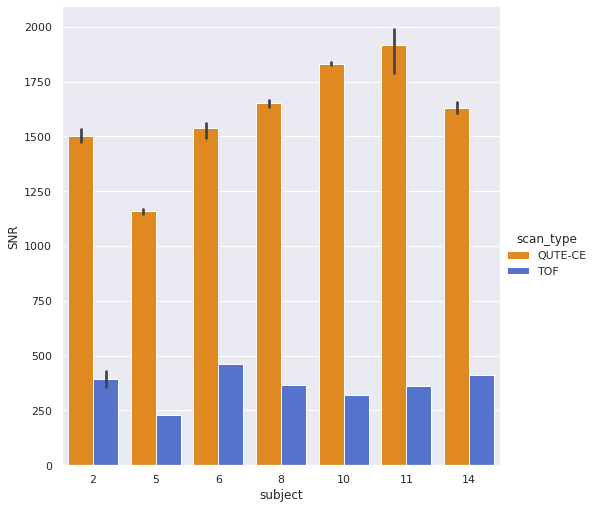

In [39]:
subjects = set(list(df_post['sub_num'])).intersection(list(df_tof['sub_num']))

filt_df = df_postandtof
filt_df = filt_df.replace(to_replace ="hr", value ="QUTE-CE") 
filt_df = filt_df[filt_df['sub_num'].isin(subjects)]

filt_df = filt_df.reset_index()
a = filt_df['sub_num'].nunique() / 7

filt_df.rename(columns={'sub_num': 'subject'}, inplace=True)

y_axis = 'SNR'
sns_plot = sns.catplot(x="subject",
                       y=y_axis,
                       hue="scan_type",
                       kind="bar",
                       height=7,
                       aspect=a,
                       palette=['darkorange', 'royalblue'],
                       data=filt_df)

# sns_plot.set_size_inches(11.7, 8.27)

save_name = (y_axis + '_per-subject_filtered.png')
sns_plot.savefig(save_name, dpi=300)


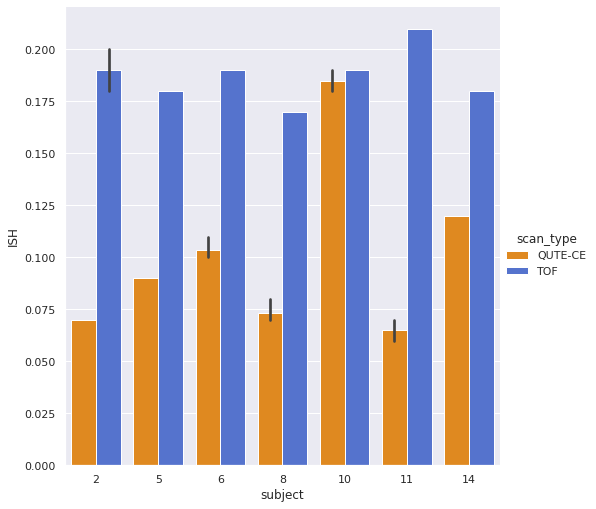

In [40]:
y_axis = "ISH"
sns_plot = sns.catplot(x="subject",
                       y=y_axis,
                       hue="scan_type",
                       kind="bar",
                       height=7,
                       aspect=a,
                       palette=['darkorange', 'royalblue'],
                       data=filt_df)

save_name = (y_axis + '_per-subject_filtered.png')
sns_plot.savefig(save_name, dpi=300)

In [24]:
filt_df.head()

,index,subject,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,scan_type,motion,severe_motion
0,34,2,1132.72,84.73,Postcon,rsub-02_ses-Postcon_hr_run-02_UTE_desc-preproc,159.65,9.56,0.74,rsub-02_ses-Postcon_hr_run-02_UTE_desc-preproc...,1532.88,1316.83,0.07,QUTE-CE,0,0
1,35,2,1128.18,81.92,Postcon,rsub-02_ses-Postcon_hr_run-03_UTE_desc-preproc,156.21,7.17,0.77,rsub-02_ses-Postcon_hr_run-03_UTE_desc-preproc...,1474.43,1270.28,0.07,QUTE-CE,0,0
2,44,5,1427.90,122.26,Postcon,rsub-05_ses-Postcon_hr_run-01_UTE_desc-preproc,215.80,23.03,1.25,rsub-05_ses-Postcon_hr_run-01_UTE_desc-preproc...,1146.64,973.35,0.09,QUTE-CE,1,0
3,45,5,1428.06,134.31,Postcon,rsub-05_ses-Postcon_hr_run-02_UTE_desc-preproc,219.75,19.66,1.22,rsub-05_ses-Postcon_hr_run-02_UTE_desc-preproc...,1170.36,990.27,0.09,QUTE-CE,1,0
4,48,6,1968.49,206.76,Postcon,rsub-06_ses-Postcon_hr_run-01_UTE_desc-preproc,252.17,9.38,1.32,rsub-06_ses-Postcon_hr_run-01_UTE_desc-preproc...,1492.08,1300.94,0.11,QUTE-CE,0,0


In [14]:
T1w_csv_fname = 'FULL_SUMMARY_seg-CNR_withmotion_T1w.csv'
T1w_df = pd.read_csv(T1w_csv_fname)
T1w_df = T1w_df.drop(columns=['level_0', 'index_x', 'index_y', 'index'])

cols = T1w_df.columns.tolist()
cols
#hr_df = hr_df[cols]

['signal_mean',
 'signal_std',
 'session',
 'scan',
 'tissue_mean',
 'tissue_std',
 'noise_std',
 'file',
 'SNR',
 'CNR',
 'ISH',
 'sub_num',
 'scan_type',
 'motion',
 'severe_motion']

In [15]:
df

,sub_num,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,scan_type,motion,severe_motion
0,2,100.58,10.82,Precon,rrrsub-02_ses-Precon_hr_run-01_UTE_desc-preproc,128.75,3.02,0.39,rrrsub-02_ses-Precon_hr_run-01_UTE_desc-prepro...,254.94,-71.42,0.11,hr,0,0
1,2,101.48,11.29,Precon,rrrsub-02_ses-Precon_hr_run-02_UTE_desc-preproc,130.84,3.43,0.41,rrrsub-02_ses-Precon_hr_run-02_UTE_desc-prepro...,250.10,-72.35,0.11,hr,0,0
2,3,224.52,67.47,Precon,rrrsub-03_ses-Precon_hr_run-01_UTE_desc-preproc,243.47,7.16,1.35,rrrsub-03_ses-Precon_hr_run-01_UTE_desc-prepro...,166.02,-14.02,0.30,hr,1,0
3,3,223.73,67.33,Precon,rrrsub-03_ses-Precon_hr_run-02_UTE_desc-preproc,237.82,6.86,1.44,rrrsub-03_ses-Precon_hr_run-02_UTE_desc-prepro...,155.70,-9.81,0.30,hr,1,0
4,4,203.74,59.47,Precon,rrrsub-04_ses-Precon_hr_run-01_UTE_desc-preproc,233.32,7.36,1.30,rrrsub-04_ses-Precon_hr_run-01_UTE_desc-prepro...,156.50,-22.72,0.29,hr,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,7,78.60,14.31,Precon,rrrsub-07_ses-Precon_TOF_angio_corrected,16.56,1.75,0.71,rrrsub-07_ses-Precon_TOF_angio_corrected_SUMMA...,110.89,87.52,0.18,TOF,0,0
6,8,517.71,87.38,Precon,rrrsub-08_ses-Precon_TOF_angio_corrected,116.34,10.30,1.42,rrrsub-08_ses-Precon_TOF_angio_corrected_SUMMA...,365.11,283.07,0.17,TOF,0,0
7,10,600.71,112.89,Precon,rrrsub-10_ses-Precon_TOF_angio_corrected,130.85,13.10,1.86,rrrsub-10_ses-Precon_TOF_angio_corrected_SUMMA...,322.39,252.16,0.19,TOF,0,0
8,11,376.54,80.16,Precon,rrrsub-11_ses-Precon_TOF_angio_corrected,80.41,5.97,1.04,rrrsub-11_ses-Precon_TOF_angio_corrected_SUMMA...,361.70,284.46,0.21,TOF,0,0


In [16]:
T1w_UTE_TOF_df = pd.concat([T1w_df, df])
# df = df.drop(columns=['level_0'])
T1w_UTE_TOF_df.tail()

,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,sub_num,scan_type,motion,severe_motion
5,78.60,14.31,Precon,rrrsub-07_ses-Precon_TOF_angio_corrected,16.56,1.75,0.71,rrrsub-07_ses-Precon_TOF_angio_corrected_SUMMA...,110.89,87.52,0.18,7,TOF,0,0
6,517.71,87.38,Precon,rrrsub-08_ses-Precon_TOF_angio_corrected,116.34,10.30,1.42,rrrsub-08_ses-Precon_TOF_angio_corrected_SUMMA...,365.11,283.07,0.17,8,TOF,0,0
7,600.71,112.89,Precon,rrrsub-10_ses-Precon_TOF_angio_corrected,130.85,13.10,1.86,rrrsub-10_ses-Precon_TOF_angio_corrected_SUMMA...,322.39,252.16,0.19,10,TOF,0,0
8,376.54,80.16,Precon,rrrsub-11_ses-Precon_TOF_angio_corrected,80.41,5.97,1.04,rrrsub-11_ses-Precon_TOF_angio_corrected_SUMMA...,361.70,284.46,0.21,11,TOF,0,0
9,686.46,124.00,Precon,rrrsub-14_ses-Precon_TOF_angio_corrected,147.35,10.86,1.67,rrrsub-14_ses-Precon_TOF_angio_corrected_SUMMA...,411.43,323.12,0.18,14,TOF,0,0


In [21]:
ISH_stats = T1w_UTE_TOF_df.groupby(['scan_type', 'session'])['ISH'].describe()[['count','mean', 'std']].round(3)
ISH_stats

count   mean    std
scan_type session                     
T1w       Postcon    9.0  0.212  0.061
          Precon     9.0  0.348  0.128
TOF       Precon    10.0  0.190  0.016
hr        Postcon   42.0  0.097  0.033
          Precon    33.0  0.223  0.084

In [22]:
stats = T1w_UTE_TOF_df.groupby(['scan_type', 'session'])['CNR'].describe()[['count','mean', 'std']].round(3)
stats

count      mean      std
scan_type session                          
T1w       Postcon    9.0   248.437   86.153
          Precon     9.0  -130.751   34.531
TOF       Precon    10.0   268.672   82.371
hr        Postcon   42.0  1414.349  326.366
          Precon    33.0   -23.039   16.447

In [19]:
stats = T1w_UTE_TOF_df.groupby(['scan_type', 'session', 'sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
stats

count      mean      std
scan_type session sub_num                          
T1w       Postcon 2          1.0   331.210      NaN
                  3          1.0   664.270      NaN
                  4          1.0   490.050      NaN
                  5          1.0   554.330      NaN
                  6          1.0   310.510      NaN
                  7          1.0   375.370      NaN
                  8          1.0   554.160      NaN
                  10         1.0   512.110      NaN
                  11         1.0   456.090      NaN
          Precon  2          1.0   107.250      NaN
                  3          1.0   200.480      NaN
                  4          1.0    55.170      NaN
                  5          1.0   152.530      NaN
                  6          1.0   112.140      NaN
                  7          1.0    87.690      NaN
                  8          1.0   101.370      NaN
                  10         1.0   134.410      NaN
                  11         1.0   102.230      NaN
TOF       Precon  2          2.0   392.940   53.330
                  4          1.0   384.580      NaN
                  5          1.0   227.800      NaN
                  6          1.0   463.350      NaN
                  7          1.0   110.890      NaN
                  8          1.0   365.110      NaN
                  10         1.0   322.390      NaN
                  11         1.0   361.700      NaN
                  14         1.0   411.430      NaN
hr        Postcon 2          3.0  1511.197   32.011
                  3          4.0  1962.278   84.243
                  4          4.0  2249.560  169.645
                  5          4.0  1062.090  205.951
                  6          3.0  1536.030   38.171
                  7          4.0  1165.260  581.152
                  8          4.0  1615.060   73.102
                  10         3.0  1835.203   10.501
                  11         4.0  1916.700  126.644
                  12         3.0  1790.700   43.122
                  13         2.0  1826.860   49.724
                  14         2.0  1630.550   36.996
                  15         2.0  1570.930   14.708
          Precon  2          2.0   252.520    3.422
                  3          2.0   160.860    7.297
                  4          2.0   152.945    5.028
                  5          8.0   176.028   14.590
                  6          2.0   163.320    2.744
                  7          6.0   124.090    2.322
                  8          1.0   170.260      NaN
                  10         1.0   227.580      NaN
                  11         3.0   172.290    5.793
                  12         2.0   211.320    5.402
                  13         1.0   200.170      NaN
                  14         1.0   203.560      NaN
                  15         2.0   236.795    4.320

In [21]:
df_post = df.loc[(df['scan_type']=='hr') & (df['session']=='Postcon')]
df_pre = df.loc[(df['scan_type']=='hr') & (df['session']=='Precon')]
df_tof = df.loc[(df['scan_type']=='TOF') & (df['session']=='Precon')]
df_post

,sub_num,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,scan_type,motion,severe_motion
34,2,1132.72,84.73,Postcon,rsub-02_ses-Postcon_hr_run-02_UTE_desc-preproc,159.65,9.56,0.74,rsub-02_ses-Postcon_hr_run-02_UTE_desc-preproc...,1532.88,1316.83,0.07,hr,0,0
35,2,1128.18,81.92,Postcon,rsub-02_ses-Postcon_hr_run-03_UTE_desc-preproc,156.21,7.17,0.77,rsub-02_ses-Postcon_hr_run-03_UTE_desc-preproc...,1474.43,1270.28,0.07,hr,0,0
36,3,2389.75,189.76,Postcon,rsub-03_ses-Postcon_hr_run-01_UTE_desc-preproc,350.59,13.09,1.15,rsub-03_ses-Postcon_hr_run-01_UTE_desc-preproc...,2074.10,1769.82,0.08,hr,1,0
37,3,2369.63,192.25,Postcon,rsub-03_ses-Postcon_hr_run-02_UTE_desc-preproc,358.68,16.06,1.24,rsub-03_ses-Postcon_hr_run-02_UTE_desc-preproc...,1912.10,1622.68,0.08,hr,1,0
38,3,2367.36,185.35,Postcon,rsub-03_ses-Postcon_hr_run-03_UTE_desc-preproc,352.80,12.84,1.20,rsub-03_ses-Postcon_hr_run-03_UTE_desc-preproc...,1978.19,1683.39,0.08,hr,1,0
39,3,2466.63,222.56,Postcon,rsub-03_ses-Postcon_hr_run-04_UTE_desc-preproc,392.11,17.70,1.31,rsub-03_ses-Postcon_hr_run-04_UTE_desc-preproc...,1884.72,1585.11,0.09,hr,1,0
44,5,1427.90,122.26,Postcon,rsub-05_ses-Postcon_hr_run-01_UTE_desc-preproc,215.80,23.03,1.25,rsub-05_ses-Postcon_hr_run-01_UTE_desc-preproc...,1146.64,973.35,0.09,hr,1,0
45,5,1428.06,134.31,Postcon,rsub-05_ses-Postcon_hr_run-02_UTE_desc-preproc,219.75,19.66,1.22,rsub-05_ses-Postcon_hr_run-02_UTE_desc-preproc...,1170.36,990.27,0.09,hr,1,0
48,6,1968.49,206.76,Postcon,rsub-06_ses-Postcon_hr_run-01_UTE_desc-preproc,252.17,9.38,1.32,rsub-06_ses-Postcon_hr_run-01_UTE_desc-preproc...,1492.08,1300.94,0.11,hr,0,0
49,6,1958.63,199.83,Postcon,rsub-06_ses-Postcon_hr_run-02_UTE_desc-preproc,253.72,7.87,1.25,rsub-06_ses-Postcon_hr_run-02_UTE_desc-preproc...,1560.89,1358.70,0.10,hr,0,0


In [22]:
df_T1w_post = T1w_UTE_TOF_df.loc[(T1w_UTE_TOF_df['scan_type']=='T1w') & (T1w_UTE_TOF_df['session']=='Postcon')]
df_T1w_pre = T1w_UTE_TOF_df.loc[(T1w_UTE_TOF_df['scan_type']=='T1w') & (T1w_UTE_TOF_df['session']=='Precon')]
#df_tof = df.loc[(df['scan_type']=='TOF') & (df['session']=='Precon')]
df_T1w_post

,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,sub_num,scan_type,motion,severe_motion
0,435.28,84.50,Postcon,rsub-02_ses-Postcon_T1w_corrected,196.69,9.95,1.31,rsub-02_ses-Postcon_T1w_corrected_SUMMARY_seg-...,331.21,181.54,0.19,2,T1w,0,1
2,737.63,158.50,Postcon,rsub-03_ses-Postcon_T1w_corrected,335.69,22.80,1.11,rsub-03_ses-Postcon_T1w_corrected_SUMMARY_seg-...,664.27,361.96,0.21,3,T1w,0,1
4,791.08,158.86,Postcon,rsub-04_ses-Postcon_T1w_corrected,363.24,27.36,1.61,rsub-04_ses-Postcon_T1w_corrected_SUMMARY_seg-...,490.05,265.04,0.20,4,T1w,0,1
6,717.34,94.04,Postcon,rsub-05_ses-Postcon_T1w_corrected,315.68,26.60,1.29,rsub-05_ses-Postcon_T1w_corrected_SUMMARY_seg-...,554.33,310.39,0.13,5,T1w,0,1
8,620.33,186.62,Postcon,rsub-06_ses-Postcon_T1w_corrected,371.86,15.53,2.00,rsub-06_ses-Postcon_T1w_corrected_SUMMARY_seg-...,310.51,124.38,0.30,6,T1w,0,1
10,522.73,125.53,Postcon,rsub-07_ses-Postcon_T1w_corrected,232.13,18.06,1.39,rsub-07_ses-Postcon_T1w_corrected_SUMMARY_seg-...,375.37,208.68,0.24,7,T1w,0,1
12,837.35,101.98,Postcon,rsub-08_ses-Postcon_T1w_corrected,297.89,47.92,1.51,rsub-08_ses-Postcon_T1w_corrected_SUMMARY_seg-...,554.16,357.01,0.12,8,T1w,0,1
14,896.81,254.36,Postcon,rsub-10_ses-Postcon_T1w_corrected,421.65,16.70,1.75,rsub-10_ses-Postcon_T1w_corrected_SUMMARY_seg-...,512.11,271.33,0.28,10,T1w,0,1
16,525.69,125.29,Postcon,rsub-11_ses-Postcon_T1w_corrected,346.35,17.57,1.15,rsub-11_ses-Postcon_T1w_corrected_SUMMARY_seg-...,456.09,155.60,0.24,11,T1w,0,1


In [23]:
PostSNR_T1w = df_T1w_post.groupby(['sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
PreSNR_T1w = df_T1w_pre.groupby(['sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
sessionCNR_T1w = PostSNR_T1w['mean'] - PreSNR_T1w['mean']
sesCNR_df_T1w = sessionCNR_T1w.describe()[['count','mean', 'std']].round(3)
sesCNR_df_T1w

count      9.000
mean     354.981
std       97.930
Name: mean, dtype: float64

In [24]:
PostSNR_T1w = df_T1w_post.groupby(['sub_num'])['SNR'].describe()[['count','mean', 'std']].round(3)
factor = PostSNR['mean'] / PostSNR_T1w['mean']
factor_df = factor.describe()[['count','mean', 'std']].round(3)
factor_df

NameError: name 'PostSNR' is not defined

In [25]:
df_post_withT1w = T1w_UTE_TOF_df.loc[(T1w_UTE_TOF_df['session']=='Postcon')]
df_post_withT1w.head()

,signal_mean,signal_std,session,scan,tissue_mean,tissue_std,noise_std,file,SNR,CNR,ISH,sub_num,scan_type,motion,severe_motion
0,435.28,84.50,Postcon,rsub-02_ses-Postcon_T1w_corrected,196.69,9.95,1.31,rsub-02_ses-Postcon_T1w_corrected_SUMMARY_seg-...,331.21,181.54,0.19,2,T1w,0,1
2,737.63,158.50,Postcon,rsub-03_ses-Postcon_T1w_corrected,335.69,22.80,1.11,rsub-03_ses-Postcon_T1w_corrected_SUMMARY_seg-...,664.27,361.96,0.21,3,T1w,0,1
4,791.08,158.86,Postcon,rsub-04_ses-Postcon_T1w_corrected,363.24,27.36,1.61,rsub-04_ses-Postcon_T1w_corrected_SUMMARY_seg-...,490.05,265.04,0.20,4,T1w,0,1
6,717.34,94.04,Postcon,rsub-05_ses-Postcon_T1w_corrected,315.68,26.60,1.29,rsub-05_ses-Postcon_T1w_corrected_SUMMARY_seg-...,554.33,310.39,0.13,5,T1w,0,1
8,620.33,186.62,Postcon,rsub-06_ses-Postcon_T1w_corrected,371.86,15.53,2.00,rsub-06_ses-Postcon_T1w_corrected_SUMMARY_seg-...,310.51,124.38,0.30,6,T1w,0,1


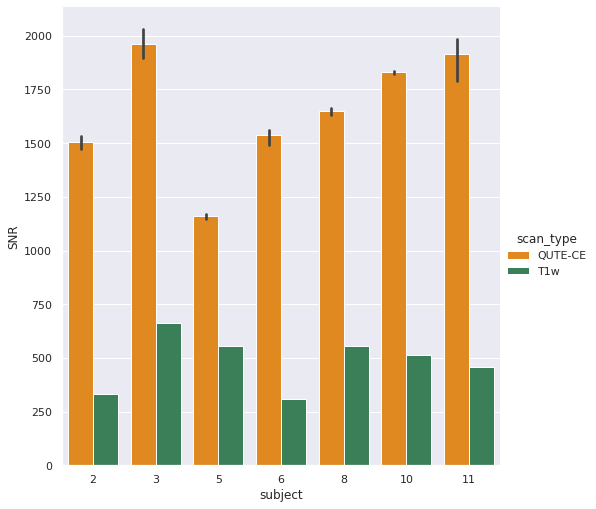

In [70]:
subjects = set(list(df_post['sub_num'])).intersection(list(df_T1w_post['sub_num']))

filt_df = df_post_withT1w
filt_df = filt_df.replace(to_replace ="hr", value ="QUTE-CE") 
filt_df = filt_df[filt_df['sub_num'].isin(subjects)]

filt_df = filt_df.reset_index()
a = filt_df['sub_num'].nunique() / 7

filt_df.rename(columns={'sub_num': 'subject'}, inplace=True)
filt_df = filt_df.sort_values(by=['scan_type'], ascending=True)


y_axis = 'SNR'
sns_plot = sns.catplot(x="subject",
                       y=y_axis,
                       hue="scan_type",
                       kind="bar",
                       height=7,
                       aspect=a,
                       palette=['darkorange', 'seagreen'],
                       data=filt_df)

# sns_plot.set_size_inches(11.7, 8.27)

save_name = (y_axis + '_per-subject_filtered_T1w.png')
sns_plot.savefig(save_name, dpi=300)

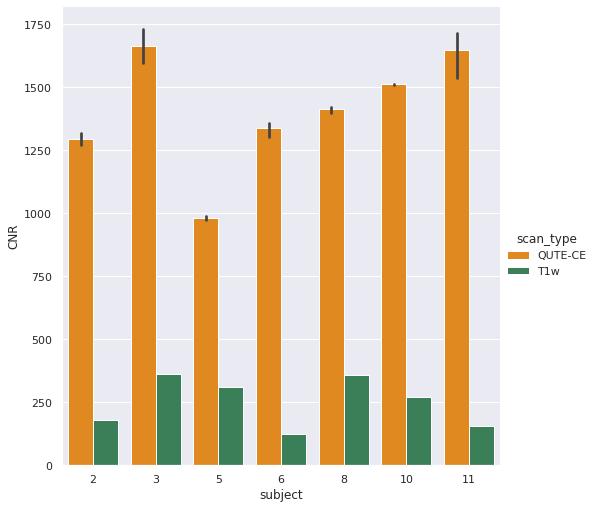

In [72]:
y_axis = "CNR"
sns_plot = sns.catplot(x="subject",
                       y=y_axis,
                       hue="scan_type",
                       kind="bar",
                       height=7,
                       aspect=a,
                       palette=['darkorange', 'seagreen'],
                       data=filt_df)

save_name = (y_axis + '_per-subject_filtered_T1w.png')
# save_name = (y_axis + '_per-subject_filtered.png')
sns_plot.savefig(save_name, dpi=300)

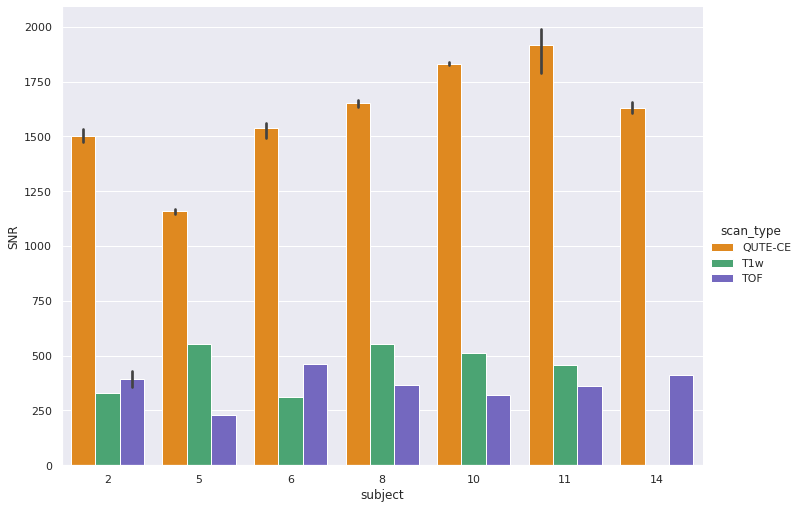

In [50]:
filt_df = T1w_UTE_TOF_df.loc[(T1w_UTE_TOF_df['session']=='Postcon') | (T1w_UTE_TOF_df['scan_type']=='TOF') ]
filt_df = filt_df.replace(to_replace ="hr", value ="QUTE-CE") 
subjects = set(list(df_post['sub_num'])).intersection(list(df_tof['sub_num']))
filt_df = filt_df[filt_df['sub_num'].isin(subjects)]

filt_df = filt_df.reset_index()
a = filt_df['sub_num'].nunique() / 5
filt_df = filt_df.sort_values(by=['scan_type'], ascending=True)

filt_df.rename(columns={'sub_num': 'subject'}, inplace=True)

y_axis = 'SNR'
sns_plot = sns.catplot(x="subject",
                       y=y_axis,
                       hue="scan_type",
                       kind="bar",
                       height=7,
                       aspect=a,
                       palette=['darkorange', 'mediumseagreen', 'slateblue'],
                       data=filt_df)


save_name = (y_axis + '_per-subject_filtered_T1w_TOF.png')
# save_name = (y_axis + '_per-subject_filtered.png')
sns_plot.savefig(save_name, dpi=300)

In [ ]:
y_axis = 'ISH'
sns_plot = sns.catplot(x="subject",
                       y=y_axis,
                       hue="scan_type",
                       kind="bar",
                       height=7,
                       aspect=a,
                       palette=['darkorange', 'mediumseagreen', 'slateblue'],
                       data=filt_df)

## CBV

In [63]:
post_ute_df = df.loc[(df['session']=='Postcon')]
Post = post_ute_df.groupby(['sub_num']).mean().round(3)
Post.rename(columns={'signal_mean': 'blood_post', 'tissue_mean': 'tissue_post'}, inplace=True)
Post = Post.drop(columns=['SNR', 'CNR', 'ISH', 'severe_motion'])


pre_ute_df = df.loc[(df['session']=='Precon')]
Pre = pre_ute_df.groupby(['sub_num']).mean().round(3)
Pre.rename(columns={'signal_mean': 'blood_pre', 'tissue_mean': 'tissue_pre'}, inplace=True)
Pre = Pre.drop(columns=['SNR', 'CNR', 'ISH', 'severe_motion'])


PrePost = pd.merge(Post, Pre, left_index=True, right_index=True)
PrePost['blood_diff'] = PrePost['blood_post'] - PrePost['blood_pre']
PrePost['tissue_diff'] = PrePost['tissue_post'] - PrePost['tissue_pre']
PrePost['CBV'] =  PrePost['tissue_diff'] / PrePost['blood_diff']

PrePost

,blood_post,signal_std_x,tissue_post,tissue_std_x,noise_std_x,motion_x,blood_pre,signal_std_y,tissue_pre,tissue_std_y,noise_std_y,motion_y,blood_diff,tissue_diff,CBV
sub_num,,,,,,,,,,,,,,,
2,1130.450,83.325,157.930,8.365,0.755,0.000,222.457,38.498,100.400,5.245,0.643,0.500,907.993,57.530,0.063360
3,2398.342,197.480,363.545,14.922,1.225,1.000,224.125,67.400,240.645,7.010,1.395,1.000,2174.217,122.900,0.056526
5,1427.980,128.285,217.775,21.345,1.235,1.000,269.886,62.886,235.422,14.764,1.482,1.000,1158.094,-17.647,-0.015238
6,1959.750,200.927,254.140,8.410,1.277,0.000,354.653,63.313,212.220,8.227,1.317,0.000,1605.097,41.920,0.026117
8,1890.607,138.703,273.227,17.457,1.143,0.333,356.235,54.100,179.865,15.085,1.280,0.000,1534.372,93.362,0.060847
10,1926.715,350.140,334.550,10.565,1.050,0.500,600.710,112.890,130.850,13.100,1.860,0.000,1326.005,203.700,0.153619
11,2084.620,137.598,292.292,11.865,1.090,0.500,243.903,39.510,151.230,5.223,1.023,0.667,1840.717,141.062,0.076634
12,2855.073,236.063,491.613,23.317,1.597,0.333,336.445,38.460,374.930,27.565,1.595,0.000,2518.628,116.683,0.046328
13,2427.545,179.850,411.050,10.910,1.330,0.000,307.860,25.590,336.230,6.660,1.540,0.000,2119.685,74.820,0.035298


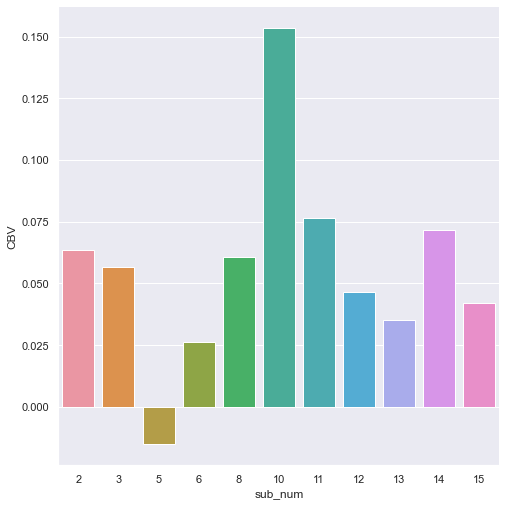

In [67]:
y_axis = "CBV"
sns_plot = sns.catplot(x="sub_num",
                       y=y_axis,
                       # hue="scan_type",
                       kind="bar",
                       height=7,
                       aspect=a,
                       data=PrePost.reset_index())

save_name = (y_axis + '_per-subject_filtered.png')
sns_plot.savefig(save_name, dpi=300)

# Phantoms

In [6]:
csv_fname = 'QUTE-CE_T1w_Blood.csv'
phantom_df = pd.read_csv(csv_fname)
phantom_df

,Segment,Number of voxels [voxels] (1),Minimum,Maximum,Mean,Median,Standard Deviation,scan_type,ISH,SNR,CNR
0,CE_Blood,749,2830,3238,3004.7900,3003,77.23340,UTE,0.025719,1406.039138,1228.380579
1,Blood,435,343,424,379.6670,380,17.69150,UTE,0.046557,177.658559,NaN
2,Air,13213,12,28,18.6836,18,2.13706,UTE,0.118726,8.742665,NaN
3,CE_Blood,749,311,448,384.2580,384,25.13420,T1w,0.065454,154.494832,51.820729
4,Blood,435,211,300,255.3700,255,13.43400,T1w,0.052682,102.674102,NaN
5,Air,13213,19,42,26.2392,25,2.48719,T1w,0.099488,10.549737,NaN
6,Bullet,701637,2190,3634,3131.8800,3169,209.27700,UTE,0.066039,1465.508690,1287.850131
7,Bullet,701637,1104,2542,1915.3800,1916,293.59900,T1w,0.153235,770.097982,667.423880


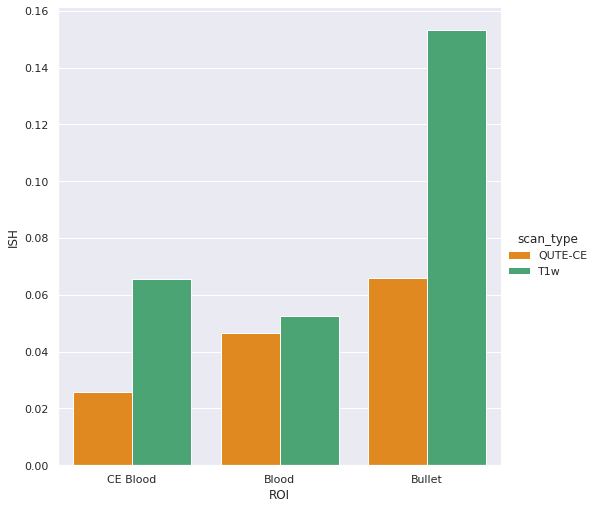

In [15]:
filt_df = phantom_df.loc[~(phantom_df['Segment']=='Air')]
filt_df = filt_df.replace(to_replace ="UTE", value ="QUTE-CE") 
filt_df = filt_df.replace(to_replace ="CE_Blood", value ="CE Blood") 


filt_df = filt_df.reset_index()
# a = filt_df['sub_num'].nunique() / 5
filt_df = filt_df.sort_values(by=['scan_type'], ascending=True)

filt_df.rename(columns={'Segment': 'ROI'}, inplace=True)

y_axis = 'ISH'
sns_plot = sns.catplot(x="ROI",
                       y=y_axis,
                       hue="scan_type",
                       kind="bar",
                       height=7,
                       #aspect=a,
                       palette=['darkorange', 'mediumseagreen'],
                       data=filt_df)


save_name = (y_axis + '_phantom_T1w_TOF.png')
# save_name = (y_axis + '_per-subject_filtered.png')
sns_plot.savefig(save_name, dpi=300)